In [1]:
#Sebelum memulai analisis data, pertama dilihat dahulu apakah data memiliki duplicate dan missing value.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA=pd.read_csv('DATA.csv', delimiter=';')

In [2]:
DATA.duplicated().sum() 

1037

In [3]:
DATA.isnull().sum() 

response                             0
platform                             0
category_name                        0
condition                            0
stock                                0
free_shipping_coverage_count         0
courier_count                        0
view_count                           0
seller_delivery_response_time    18976
favorite_count                       0
sold                                 0
varUser_1                          864
varUser_2                            0
varUser_3                            0
varUser_4                            0
varSeller_1                          0
varSeller_2                          0
varSeller_3                          0
varSeller_4                          0
varSeller_5                          0
varSeller_6                      16615
varSeller_7                      71142
varSeller_8                      16615
varSeller_9                          0
varProduct_1                         0
varProduct_2             

In [4]:
#Terdapat 1037 data duplicated dan benyak missing value, selanjutnya akan didrop semua data yang duplicated

DATA = DATA.drop_duplicates()

In [5]:
#Kemudian kita drop juga data NULL atau missing value dengan cara mengambil tabel DATA berdasarkan kriteria

DATAclean = DATA[DATA['seller_delivery_response_time'].notnull()].iloc[:,0:11]

In [6]:
#cek kembali data duplicated dan missing value

DATA.duplicated().sum() 

0

In [7]:
DATAclean.isnull().sum() 

response                         0
platform                         0
category_name                    0
condition                        0
stock                            0
free_shipping_coverage_count     0
courier_count                    0
view_count                       0
seller_delivery_response_time    0
favorite_count                   0
sold                             0
dtype: int64

In [8]:
#Data sudah tidak memiliki kolom duplicated dan missing value

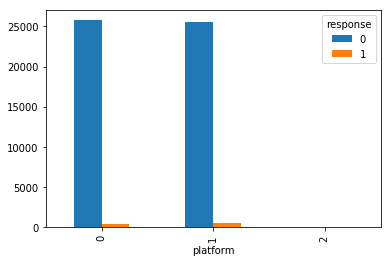

In [9]:
reduced=pd.concat([DATAclean[DATAclean['platform']==0].sample(DATAclean[DATAclean['platform']==1].shape[0]),DATAclean[DATAclean['platform']==1],DATAclean[DATAclean['platform']==2]], axis=0).reset_index()
reduced=reduced.drop(['index'],axis=1)
plat_resp=reduced.groupby(['platform', 'response']).size().unstack()
plat_resp.plot.bar()

In [10]:
platform0=DATAclean[DATAclean['platform']==2]
plt0res1=platform0[platform0['response']==1].shape[0]
plt0res0=platform0[platform0['response']==0].shape[0]

plt0res0


43

In [11]:
platform1=DATAclean[DATAclean['platform']==1]
plt1res1=platform1[platform1['response']==1].shape[0]
plt1res0=platform1[platform1['response']==0].shape[0]

plt1res1/plt1res0

0.02202574234184891

In [12]:
0.02202574234184891/0.015590614193032096

1.412756551418793

In [13]:
platform0.shape[0]/platform1.shape[0]

0.001722553973357832

In [14]:
plt0res1/plt1res1

0.003552397868561279

In [15]:
group_counts = DATAclean['category_name'].value_counts()
top3=group_counts.head(3)
top3


262    13610
137     5382
22      5309
Name: category_name, dtype: int64

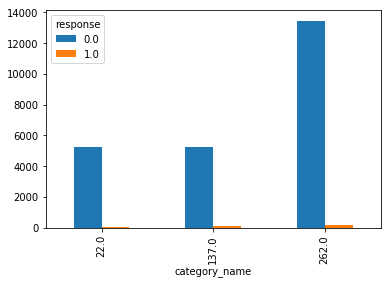

In [16]:
top3join=DATAclean.loc[(DATAclean['category_name'] == 262)].combine_first(DATAclean.loc[(DATAclean['category_name'] == 22)]).combine_first(DATAclean.loc[(DATAclean['category_name'] == 137)])
barchart=top3join.groupby(['category_name', 'response']).size().unstack()
barchart.plot.bar()

In [17]:
grup22=top3join[top3join['category_name']==22]
grup22res1=grup22[grup22['response']==1].shape[0]
grup22res1/grup22.shape[0]

0.010924844603503485

In [18]:
grup137=top3join[top3join['category_name']==137]
grup137res1=grup137[grup137['response']==1].shape[0]
grup137res1/grup137.shape[0]


0.019881085098476404

In [19]:
grup262=top3join[top3join['category_name']==262]
grup262res1=grup262[grup262['response']==1].shape[0]
grup262res1/grup262.shape[0]


0.011021307861866276

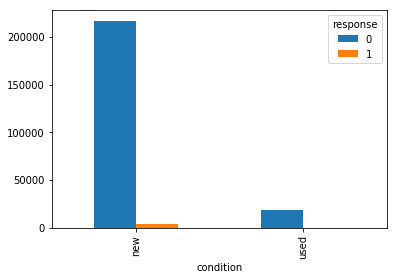

In [20]:
barchart=DATAclean.groupby(['condition', 'response']).size().unstack()
barchart.plot.bar()


In [21]:
new=DATAclean[DATAclean['condition']=='new']
peluangBeliBaru=new[new['response']==1].shape[0]/new.shape[0]
peluangBeliBaru


0.016849428614134496

In [22]:
used=DATAclean[DATAclean['condition']=='used']
peluangBeliBekas=used[used['response']==1].shape[0]/used.shape[0]
peluangBeliBekas

0.006345109426251546

In [23]:
new[new['response']==1].shape[0]/used[used['response']==1].shape[0]

31.52542372881356

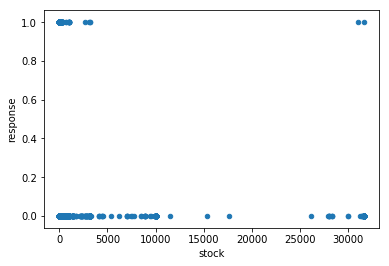

In [24]:
DATAclean.plot(kind='scatter', x='stock', y='response')

In [25]:
response0=DATAclean[DATAclean['response']==0]
response0['stock'].mean()


25.40858375294008

In [26]:
response1=DATAclean[DATAclean['response']==1]
response1['stock'].mean()


34.521886399166235

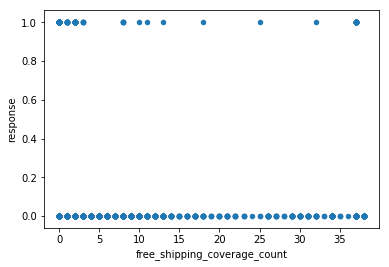

In [27]:
DATAclean.plot(kind='scatter', x='free_shipping_coverage_count', y='response')

In [28]:
response1=DATAclean[DATAclean['response']==0]
response1['stock'].max()

31623

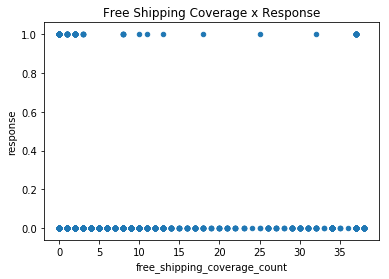

In [29]:
DATAclean.plot(kind='scatter', x='free_shipping_coverage_count', y='response', title='Free Shipping Coverage x Response')

6.555690628968652
6.0


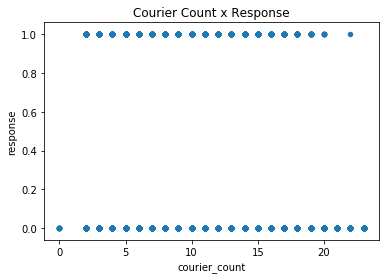

In [30]:
DATAclean.plot(kind='scatter', x='courier_count', y='response', title='Courier Count x Response')
print(DATAclean['courier_count'].mean())
print(DATAclean['courier_count'].median())

51.304984626696076
24.0


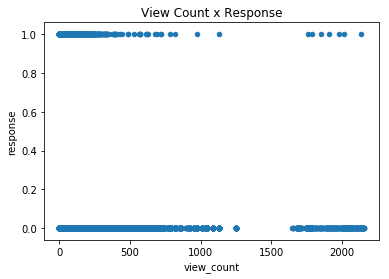

In [31]:
DATAclean.plot(kind='scatter', x='view_count', y='response', title='View Count x Response')
print(DATAclean['view_count'].mean())
print(DATAclean['view_count'].median())

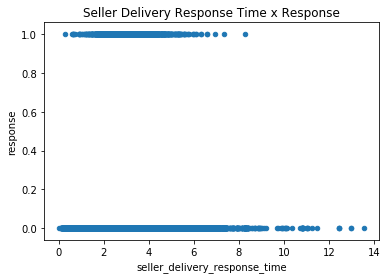

In [32]:
DATAclean.plot(kind='scatter', x='seller_delivery_response_time', y='response', title='Seller Delivery Response Time x Response')

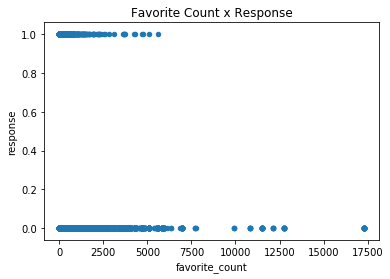

In [33]:
DATAclean.plot(kind='scatter', x='favorite_count', y='response', title='Favorite Count x Response')

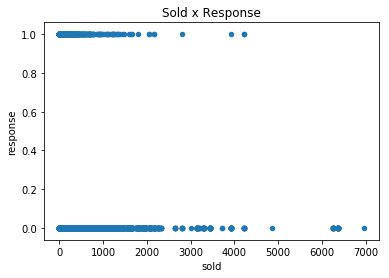

In [34]:
DATAclean.plot(kind='scatter', x='sold', y='response', title='Sold x Response')

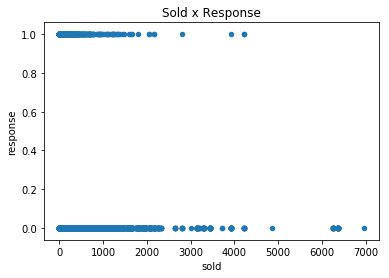

In [35]:
DATAclean.plot(kind='scatter', x='sold', y='response', title='Sold x Response')

In [36]:
DATAclean[DATAclean['platform']==0]['response'].value_counts()

0    209934
1      3273
Name: response, dtype: int64

In [37]:
DATAclean[DATAclean['platform']==1]['response'].value_counts()

0    25561
1      563
Name: response, dtype: int64

In [38]:
DATA = DATA.drop_duplicates()
DATAclean = DATA[DATA['seller_delivery_response_time'].notnull()].iloc[:,0:11]
#sample1 = DATAclean[DATAclean['response']==0].sample(DATAclean[DATAclean['response']==1].shape[0])
#sample2 = DATAclean[DATAclean['response']==1]
#DATAclean = pd.concat([sample1,sample2],axis=0).reset_index()
#DATAclean = DATAclean.drop(['index'],axis=1)

response0=DATAclean[DATAclean['response']==0]
print(response0['sold'].mean())
response1=DATAclean[DATAclean['response']==1]
print(response1['sold'].mean())
print(DATAclean[DATAclean['response']==0].shape[0])
print(DATAclean[DATAclean['response']==1].shape[0])
print(response0['sold'].var())
print(response1['sold'].var())

34.3121746809432
59.635747785304844
235538
3838
25563.283505844913
41536.259779881315


In [39]:
print(response0['free_shipping_coverage_count'].var())

9.528746425870649


In [43]:
import scipy 
from scipy.stats import spearmanr
spearmanr_coefficient, p_value = spearmanr(DATAclean['favorite_count'],DATAclean['sold'])
print (spearmanr_coefficient)

0.8372766475628689


In [44]:
spearmanr_coefficient, p_value = spearmanr(DATAclean['view_count'],DATAclean['favorite_count'])
print (spearmanr_coefficient)

0.9423365982379007


In [45]:
spearmanr_coefficient, p_value = spearmanr(DATAclean['stock'],DATAclean['sold'])
print (spearmanr_coefficient)

0.43095360977429176


In [46]:
#Membuang duplicated data
DATA = DATA.drop_duplicates()
#Membuang semua data missing value
DATAclean = DATA[DATA['seller_delivery_response_time'].notnull()]
DATAclean = DATAclean[DATAclean['varUser_1'].notnull()]
DATAclean = DATAclean[DATAclean['varSeller_6'].notnull()]
DATAclean = DATAclean[DATAclean['varSeller_7'].notnull()]
DATAclean = DATAclean[DATAclean['varSeller_8'].notnull()]
#Mengubah kolom yang memiliki value string menjadi numerik agar dapat dilakukan modeling
DATAclean = pd.get_dummies(DATAclean, columns=['condition'], drop_first=True)
DATAclean = pd.get_dummies(DATAclean, columns=['varSeller_2'], drop_first=True)
DATAclean = pd.get_dummies(DATAclean, columns=['varSeller_3'], drop_first=True)
DATAclean = pd.get_dummies(DATAclean, columns=['varProduct_3'], drop_first=True)
DATAclean = pd.get_dummies(DATAclean, columns=['varProduct_4'], drop_first=True)
#Memperbaiki nama kolom yang berubah akibat code diatas
names = DATAclean.columns.tolist()
names[names.index('condition_used')] = 'condition'
names[names.index('varSeller_2_True')] = 'varSeller_2'
names[names.index('varSeller_3_True')] = 'varSeller_3'
names[names.index('varProduct_3_True')] = 'varProduct_3'
names[names.index('varProduct_4_True')] = 'varProduct_4'
DATAclean.columns = names
DATAclean.head()

,response,platform,category_name,stock,free_shipping_coverage_count,courier_count,view_count,seller_delivery_response_time,favorite_count,sold,...,varSeller_9,varProduct_1,varProduct_2,varProduct_5,varGeneral_1,condition,varSeller_2,varSeller_3,varProduct_3,varProduct_4
1,0,0,438,9,0,5,3,3.811863,0,2,...,2,0,17,0.0,2,0,0,0,0,0
3,0,0,1,3,2,2,36,2.880625,4,2,...,7,4,22,5.0,1,0,1,0,0,0
4,0,0,131,6,0,12,102,2.341068,236,48,...,32,236,21,4.9,1,0,1,0,0,0
5,0,1,247,3,0,15,88,4.580644,0,0,...,38,0,22,0.0,1,0,0,0,0,0
7,0,1,52,32,5,4,45,4.571094,6,0,...,37,6,22,0.0,1,0,0,0,0,1


In [47]:
import scipy 
from scipy.stats import spearmanr

rows, columns = DATAclean.shape
for i in range (columns):
    for j in range (columns):
        spearmanr_coefficient, p_value = spearmanr(DATAclean.iloc[:,i],DATAclean.iloc[:,j])
        if spearmanr_coefficient>.8 and i>j:
            print ('Spearman Correlation of', DATAclean.columns[i], 'and', DATAclean.columns[j], 'is', spearmanr_coefficient)

Spearman Correlation of favorite_count and view_count is 0.9423365982379007
Spearman Correlation of sold and view_count is 0.801908953795821
Spearman Correlation of sold and favorite_count is 0.837276647562869
Spearman Correlation of varSeller_1 and varUser_1 is 0.996329213036093
Spearman Correlation of varSeller_9 and varSeller_4 is 1.0
Spearman Correlation of varProduct_1 and view_count is 0.9423365982379007
Spearman Correlation of varProduct_1 and favorite_count is 1.0
Spearman Correlation of varProduct_1 and sold is 0.8372766475628689
Spearman Correlation of varSeller_2 and varSeller_5 is 0.9191837362450964


In [48]:
DATAnoCorr=DATAclean.drop(columns=['view_count','sold','varSeller_1','varSeller_9','varProduct_1','varSeller_2'])

In [49]:
import scipy 
from scipy.stats import spearmanr

rows, columns = DATAnoCorr.shape
count=0
for i in range (columns):
    for j in range (columns):
        spearmanr_coefficient, p_value = spearmanr(DATAnoCorr.iloc[:,i],DATAnoCorr.iloc[:,j])
        if spearmanr_coefficient>.8 and i>j:
            print ('Spearman Correlation of', DATAnoCorr.columns[i], 'and', DATAnoCorr.columns[j], 'is', spearmanr_coefficient)
            count=count+1
            
print('Jumlah pasangan feature yang berkorelasi adalah:', count)

Jumlah pasangan feature yang berkorelasi adalah: 0


In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

DATA=pd.read_csv('DATA.csv', delimiter=';')

In [51]:
#Membuang duplicated data
DATA = DATA.drop_duplicates()
#Membuang semua data missing value
#sebelumnya missing value telah dicek terlebih dahulu
#DATA.isnull().sum() 
DATAclean = DATA[DATA['seller_delivery_response_time'].notnull()]
DATAclean = DATAclean[DATAclean['varUser_1'].notnull()]
DATAclean = DATAclean[DATAclean['varSeller_6'].notnull()]
DATAclean = DATAclean[DATAclean['varSeller_7'].notnull()]
DATAclean = DATAclean[DATAclean['varSeller_8'].notnull()]
#Balancing data
sample1 = DATAclean[DATAclean['response']==0].sample(DATAclean[DATAclean['response']==1].shape[0])
sample2 = DATAclean[DATAclean['response']==1]
DATAclean = pd.concat([sample1,sample2],axis=0).reset_index()
DATAclean = DATAclean.drop(['index'],axis=1)
#Membuang low informative variable
DATAclean=DATAclean.drop(columns=['category_name','view_count','sold'])
#Membuang feature yang berkorelasi tinggi dengan feature lainnya
DATAnoCorr=DATAclean.drop(columns=['varSeller_1','varSeller_9','varProduct_1','varSeller_2'])
#Mengubah kolom yang memiliki value string menjadi numerik agar dapat dilakukan modeling
DATAnoCorr= pd.get_dummies(DATAnoCorr, columns=['condition'], drop_first=True)
DATAnoCorr= pd.get_dummies(DATAnoCorr, columns=['varSeller_3'], drop_first=True)
DATAnoCorr= pd.get_dummies(DATAnoCorr, columns=['varProduct_3'], drop_first=True)
DATAnoCorr= pd.get_dummies(DATAnoCorr, columns=['varProduct_4'], drop_first=True)

In [52]:
#Memperbaiki nama kolom yang berubah akibat perubahan value string diatas
names = DATAnoCorr.columns.tolist()
names[names.index('condition_used')] = 'condition'
names[names.index('varSeller_3_True')] = 'varSeller_3'
names[names.index('varProduct_3_True')] = 'varProduct_3'
names[names.index('varProduct_4_True')] = 'varProduct_4'
DATAnoCorr.columns = names

In [53]:
# Creating test and train data
# Menggenerate kolom baru yang bernilai True sejumlah 75% total baris
DATAnoCorr['is_train'] = np.random.uniform(0,1, len(DATAnoCorr)) <= 0.75 
# Creating dataframes with test and training rows
# Membagi train dan test data set berdasarkan nilai dari kolom 'is_train'
train, test = DATAnoCorr[DATAnoCorr['is_train']==True], DATAnoCorr[DATAnoCorr['is_train']==False]

In [54]:
# Create list  of the feature column's name
features = DATAnoCorr.columns[1:]
# Creating a random forest Classifier
clf = RandomForestClassifier(n_jobs=2, min_samples_split=100)

# Training the Classifier
clf.fit(train[features], train['response'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
# Applying the trained Classifier to the test
preds=clf.predict(test[features])

# Mengecek akurasi dari modeling
cross_val_score(clf,test[features],test['response']).mean()

0.5756943487589316

In [57]:
# Classification Report
from sklearn.metrics import classification_report
print (classification_report(preds,test['response']))

             precision    recall  f1-score   support

          0       0.52      0.63      0.57       638
          1       0.68      0.58      0.62       875

avg / total       0.61      0.60      0.60      1513



In [58]:
#Mengecek penyebaran data prediksi
pd.crosstab(test['response'],preds, rownames=['Actual Response'], colnames=['Predicted Response'])

Predicted Response,0,1
Actual Response,,
0,402,371
1,236,504


In [59]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn import preprocessing

In [60]:
DATA=pd.read_csv('DATA.csv', delimiter=';')

#Membuang duplicated data
DATA = DATA.drop_duplicates()
#Membuang semua data missing value
#sebelumnya missing value telah dicek terlebih dahulu
#DATA.isnull().sum() 
DATAclean = DATA[DATA['seller_delivery_response_time'].notnull()]
DATAclean = DATAclean[DATAclean['varUser_1'].notnull()]
DATAclean = DATAclean[DATAclean['varSeller_6'].notnull()]
DATAclean = DATAclean[DATAclean['varSeller_7'].notnull()]
DATAclean = DATAclean[DATAclean['varSeller_8'].notnull()]
#Balancing data
sample1 = DATAclean[DATAclean['response']==0].sample(DATAclean[DATAclean['response']==1].shape[0])
sample2 = DATAclean[DATAclean['response']==1]
DATAclean = pd.concat([sample1,sample2],axis=0).reset_index()
DATAclean = DATAclean.drop(['index'],axis=1)
#Membuang low informative variable
DATAclean=DATAclean.drop(columns=['category_name','view_count','sold'])
#Membuang feature yang berkorelasi tinggi dengan feature lainnya
DATAnoCorr=DATAclean.drop(columns=['varSeller_1','varSeller_9','varProduct_1','varSeller_2'])
#Mengubah kolom yang memiliki value string menjadi numerik agar dapat dilakukan modeling
DATAnoCorr= pd.get_dummies(DATAnoCorr, columns=['condition'], drop_first=True)
DATAnoCorr= pd.get_dummies(DATAnoCorr, columns=['varSeller_3'], drop_first=True)
DATAnoCorr= pd.get_dummies(DATAnoCorr, columns=['varProduct_3'], drop_first=True)
DATAnoCorr= pd.get_dummies(DATAnoCorr, columns=['varProduct_4'], drop_first=True)

In [61]:
#Memperbaiki nama kolom yang berubah akibat perubahan value string diatas
names = DATAnoCorr.columns.tolist()
names[names.index('condition_used')] = 'condition'
names[names.index('varSeller_3_True')] = 'varSeller_3'
names[names.index('varProduct_3_True')] = 'varProduct_3'
names[names.index('varProduct_4_True')] = 'varProduct_4'
DATAnoCorr.columns = names

In [62]:
#Menentukan variabel idependen x dan variabel dependen y
x=DATAnoCorr.iloc[:,1:].values
y=DATAnoCorr.iloc[:,0].values

In [63]:
#Modeling Regresi Logistik
LogReg= LogisticRegression()
#Melakukan training pada classifier
LogReg.fit(x,y)

y_pred = LogReg.predict(x)
from sklearn.metrics import classification_report

#Mengecek akurasi
print(cross_val_score(LogReg,x,y).mean())

0.6014492753623188


In [64]:
#Classification Report
print (classification_report(y,y_pred))

             precision    recall  f1-score   support

          0       0.61      0.59      0.60      3036
          1       0.60      0.63      0.62      3036

avg / total       0.61      0.61      0.61      6072



In [65]:
#Mengecek penyebaran prediksi
pd.crosstab(y_pred,y, rownames=['Actual Response'], colnames=['Predicted Response'])

Predicted Response,0,1
Actual Response,,
0,1777,1114
1,1259,1922
